In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
data = data.rename(columns={"emotion":"label","pixels":"image"})

In [ ]:
data['emotion'] = data['label'].apply(lambda x: emotions[int(x)])
data

,label,image,Usage,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,Happy


In [ ]:
data.drop(columns=['Usage'],inplace=True)

In [ ]:
data

,label,image,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,Happy


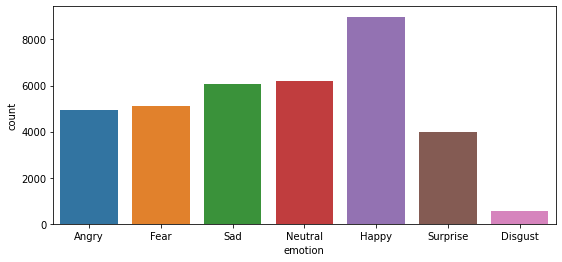

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

In [ ]:
m = data.groupby('label').count().mean().values[0]
oversampled = pd.DataFrame()
for emotion in emotions:
    print('\n' + emotion)
    l = len(data[data.emotion==emotion])
    print('Before sampling: ' + str(l))
    
    if (l>=m):
        df = data[data.emotion==emotion].sample(int(m))
        oversampled = oversampled.append(df)
        print('Ater sampling: ' + str(len(df)))
    else:
        frac = int(m/l)
        df = pd.DataFrame()
        for i in range(frac+1):
            df = df.append(data[data.emotion==emotion])
        df = df[df.emotion==emotion].sample(int(m))
        oversampled = oversampled.append(df)
        print('Ater sampling: ' + str(len(df)))
        
oversampled = oversampled.sample(frac=1).reset_index().drop(columns=['index'])


Angry
Before sampling: 4953
Ater sampling: 5126

Disgust
Before sampling: 547
Ater sampling: 5126

Fear
Before sampling: 5121
Ater sampling: 5126

Happy
Before sampling: 8989
Ater sampling: 5126

Sad
Before sampling: 6077
Ater sampling: 5126

Surprise
Before sampling: 4002
Ater sampling: 5126

Neutral
Before sampling: 6198
Ater sampling: 5126


In [ ]:
#save the oversampled dataset
oversampled.to_csv('metadata_processed.csv', index=False)

In [ ]:
data = pd.read_csv("metadata_processed.csv")

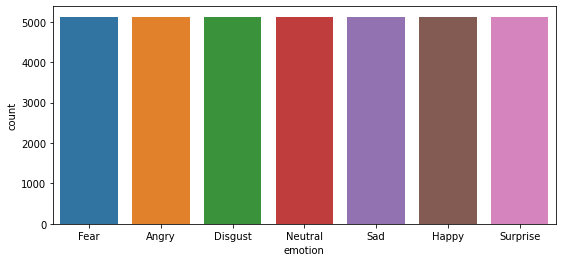

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

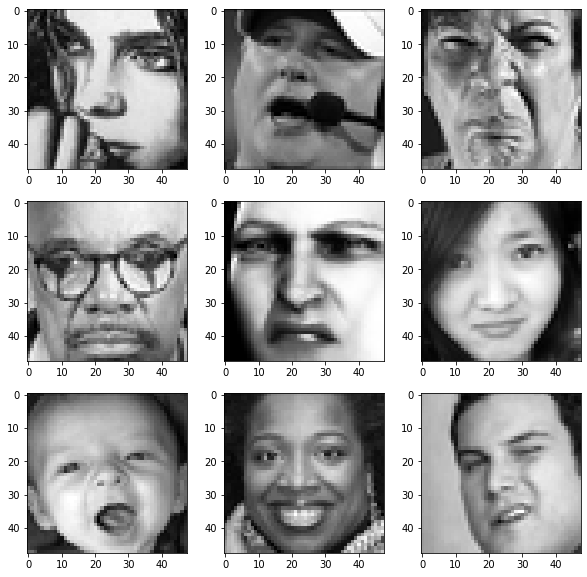

In [ ]:
labels = data.iloc[:, 0]
pixels = data.iloc[:, 1]
images = np.zeros((pixels.shape[0], 48*48))
for ix in range(images.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(images.shape[1]):
        images[ix, iy] = int(p[iy])
plt.figure(figsize = (10,10))
for index,image in enumerate(images[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(image.reshape((48,48)), cmap = 'gray')
plt.show()
train_or_test = data.iloc[:, 2].values

In [ ]:
data['emotion'].unique()

array(['Fear', 'Angry', 'Disgust', 'Neutral', 'Sad', 'Happy', 'Surprise'],
      dtype=object)

In [ ]:
reshaped_images = np.zeros((images.shape[0], 48, 48,1))
i = 0
for image in images:
  reshaped_images[i] = image.reshape((48,48,1))
  i+=1
reshaped_images.shape

(35882, 48, 48, 1)

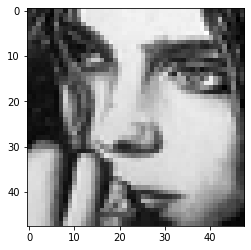

In [ ]:
norm_images = reshaped_images / 255.0
plt.imshow(norm_images[0].reshape((48,48)), cmap="gray")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
new_labels = to_categorical(labels, num_classes=7)
new_labels.shape

(35882, 7)

In [ ]:
reshaped_images.shape

(35882, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_images, new_labels, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28705, 48, 48, 1), (7177, 48, 48, 1), (28705, 7), (7177, 7))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
#Building up Model Architecture
model = Sequential()
model.add(Conv2D(64, (3,3), padding = "same", input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation = "softmax"))

opt = Adam(lr = 0.0005)

model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 4,478,727
Trainable params: 4,474,759
Non-trainable params: 3,968
_________________________________________________________________


In [ ]:
epochs = 30

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

checkpoint = ModelCheckpoint("fer_model.h5", monitor='val_loss', 
                             mode='max', verbose=1)

callbacks = [checkpoint, reduce_lr]

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks, epochs = epochs)

Epoch 1/30
898/898 [==============================] - ETA: 0s - loss: 1.8752 - accuracy: 0.2863
Epoch 1: saving model to fer_model.h5
898/898 [==============================] - 18s 20ms/step - loss: 1.8752 - accuracy: 0.2863 - val_loss: 1.5855 - val_accuracy: 0.3985 - lr: 5.0000e-04
Epoch 2/30
895/898 [============================>.] - ETA: 0s - loss: 1.4563 - accuracy: 0.4462
Epoch 2: saving model to fer_model.h5
898/898 [==============================] - 19s 21ms/step - loss: 1.4566 - accuracy: 0.4462 - val_loss: 1.2668 - val_accuracy: 0.5218 - lr: 5.0000e-04
Epoch 3/30
897/898 [============================>.] - ETA: 0s - loss: 1.2495 - accuracy: 0.5275
Epoch 3: saving model to fer_model.h5
898/898 [==============================] - 18s 20ms/step - loss: 1.2495 - accuracy: 0.5275 - val_loss: 1.1455 - val_accuracy: 0.5654 - lr: 5.0000e-04
Epoch 4/30
896/898 [============================>.] - ETA: 0s - loss: 1.1335 - accuracy: 0.5702
Epoch 4: saving model to fer_model.h5
898/898 [=====

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [ ]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt 
def _predict(path):
  facecasc = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  imagePath = path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                             
    plt.imshow(image)
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

225/225 [==============================] - 1s 5ms/step
CNN Model Accuracy on test set: 0.7243


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

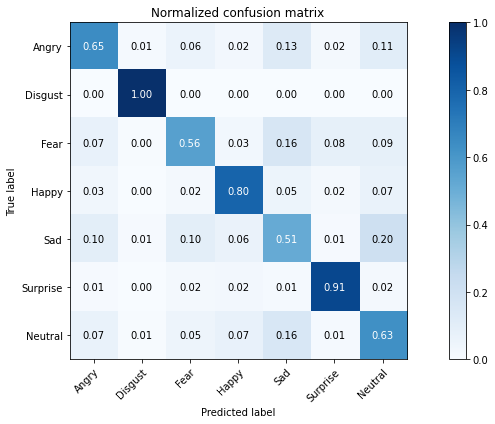

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred))

225/225 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1003
           1       0.96      1.00      0.98      1031
           2       0.69      0.56      0.62      1026
           3       0.79      0.80      0.79      1018
           4       0.50      0.51      0.51      1029
           5       0.86      0.91      0.89      1041
           6       0.57      0.63      0.60      1029

    accuracy                           0.72      7177
   macro avg       0.72      0.72      0.72      7177
weighted avg       0.72      0.72      0.72      7177

